In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

## 1) Escribir un programa que calcule el número

In [2]:
def invexponencial(x,N):
  e=0
  for i in range(N):
    sing=(-1)**i
    e=e+(sing*(((x)**i)/np.math.factorial(i)))
  return e

In [3]:
print(np.exp(-1/2))
print(invexponencial(1/2,20))

0.6065306597126334
0.6065306597126333


## Comparación

In [4]:
def comparacion(x,N):
  if abs((-x**(N+1))/(np.math.factorial(N+1)))<=abs(1E-7*invexponencial(x,N)):
    return True
  else:
    return False

In [5]:
comparacion(0.001,20)

True

## Diferencia entre 1/exp(x) y exp(-x) para valores muy grandes

In [6]:
print(np.exp(-100))
print(1/np.exp(100))
abs(np.exp(-100)-1/np.exp(100))

3.720075976020836e-44
3.7200759760208356e-44


4.9784122222889134e-60

## Convergencia de la serie dependiendo de x

In [7]:
for j in range(0,10):
  print(j," ",invexponencial(j,20),"   ",np.exp(-j))


0   1.0     1.0
1   0.36787944117144245     0.36787944117144233
2   0.1353352832362194     0.1353352832366127
3   0.04978706711474102     0.049787068367863944
4   0.018315259717021463     0.01831563888873418
5   0.00670634105421557     0.006737946999085467
6   0.0013126228039965042     0.0024787521766663585
7   -0.0236134818594909     0.0009118819655545162
8   -0.3415891012417609     0.00033546262790251185
9   -3.4829765179280283     0.00012340980408667956


desde x=4 la función empieza a perder certeza, y desde x=7 la serie deja de converger

## Grafica del error como función de N para distintos valores de x

Para x=1 y N=100

Text(0, 0.5, 'Error')

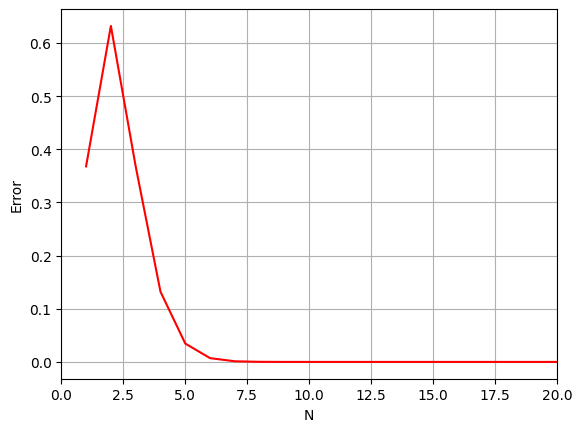

In [8]:
X=np.arange(1,100)
Y=np.zeros(99)
for h in range(len(X)):
  Y[h]=abs(np.exp(-1)-invexponencial(1,h))
plt.plot(X,Y,"r")
plt.grid()
plt.xlim(0,20)
plt.xlabel("N")
plt.ylabel("Error")

Para x=2 y N=100

Text(0, 0.5, 'Error')

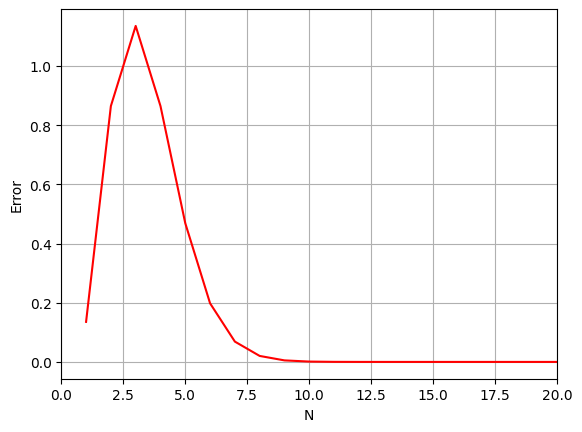

In [9]:
for h in range(len(X)):
  Y[h]=abs(np.exp(-2)-invexponencial(2,h))
plt.plot(X,Y,"r")
plt.grid()
plt.xlim(0,20)
plt.xlabel("N")
plt.ylabel("Error")

Para x=3 y N=100

Text(0, 0.5, 'Error')

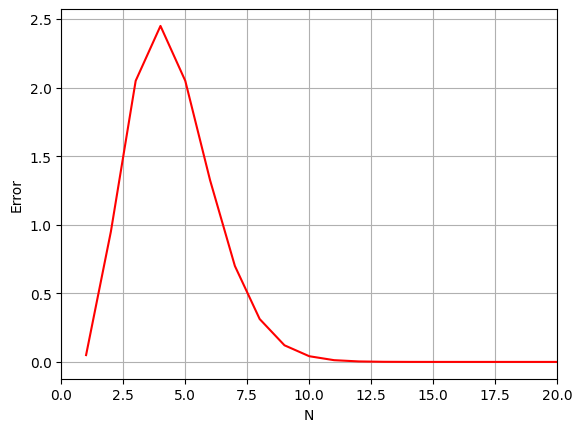

In [10]:
for h in range(len(X)):
  Y[h]=abs(np.exp(-3)-invexponencial(3,h))
plt.plot(X,Y,"r")
plt.grid()
plt.xlim(0,20)
plt.xlabel("N")
plt.ylabel("Error")

Para x=4 y N=100

Text(0, 0.5, 'Error')

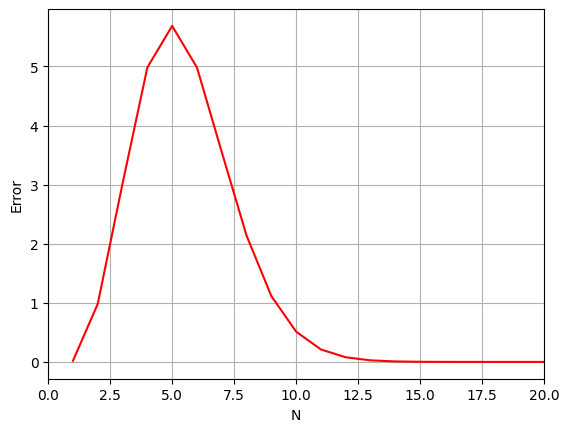

In [11]:
for h in range(len(X)):
  Y[h]=abs(np.exp(-4)-invexponencial(4,h))
plt.plot(X,Y,"r")
plt.grid()
plt.xlim(0,20)
plt.xlabel("N")
plt.ylabel("Error")

## 2) Cancelación sustractiva

Escribir un codigo que realice el calculo de las tres series

In [12]:
def S_1(N):
  s=0
  for i in range(1,N*2+1):
    sing=(-1)**i
    s=s+(sing*(i/(i+1)))
  return s

In [13]:
def S_2(N):
  s1=0
  s2=0
  for i in range(1,N+1):
    s1=s1+((2*i-1)/(2*i))
  for j in range(1,N+1):
    s2=s2+((2*j)/((2*j)+1))
  s3=-s1+s2
  return s3

In [14]:
def S_3(N):
  s3=0
  for i in range(1,N):
    s3=s3+(1/((2*i)*(2*i+1)))
  return s3

In [15]:
for k in range(0,100):
  print(k," ",S_1(k)," ",S_2(k)," ",S_3(k))

0   0   0   0
1   0.16666666666666663   0.16666666666666663   0
2   0.21666666666666667   0.21666666666666679   0.16666666666666666
3   0.2404761904761904   0.2404761904761905   0.21666666666666667
4   0.25436507936507924   0.25436507936507935   0.24047619047619048
5   0.2634559884559883   0.2634559884559886   0.25436507936507935
6   0.2698662448662448   0.269866244866245   0.26345598845598844
7   0.2746281496281495   0.27462814962814974   0.26986624486624483
8   0.2783046202163848   0.27830462021638525   0.2746281496281496
9   0.2812285968245719   0.28122859682457246   0.27830462021638486
10   0.2836095492055243   0.2836095492055257   0.281228596824572
11   0.2855858337905045   0.28558583379050617   0.2836095492055244
12   0.2872525004571711   0.2872525004571731   0.2855858337905046
13   0.28867700188167245   0.2886770018816751   0.28725250045717127
14   0.28990852897526853   0.2899085289752712   0.28867700188167267
15   0.29098379779247285   0.2909837977924745   0.28990852897526875
1

Como podemos observar, pareciera que las tres series convergen, ahora si suponemos que S3 es la solución exacta, entonces:

In [16]:
def e(x,y):
  e=abs((x-y)/y)
  return e

In [ ]:
X=np.zeros(3000,dtype=float)
Y=np.zeros(3000,dtype=float)
for i in range(2,len(X)):
  X[i]=S_3(i)
  Y[i]=e(S_1(i),S_3(i))
X=np.log10(X)
Y=np.log10(Y)
plt.plot(Y,X,"r.-")
plt.xlabel("Log E")
plt.ylabel("Log N")

In [ ]:
X=np.zeros(3000,dtype=float)
Y=np.zeros(3000,dtype=float)
for i in range(2,len(X)):
  X[i]=S_3(i)
  Y[i]=e(S_2(i),S_3(i))
X=np.log10(X)
Y=np.log10(Y)
plt.plot(Y,X,"b.-")
plt.xlabel("Log E")
plt.ylabel("Log N")